# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list

In [3]:
# Set the API base URL
    # Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

    # Build partial query URL
query_url= f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print(f"Record for {city} not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mount pearl
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | dudinka
Processing Record 4 of Set 1 | volodarskiy
Processing Record 5 of Set 1 | regina
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | karak
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | kolonia
Processing Record 11 of Set 1 | batang
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | kushiro
Processing Record 14 of Set 1 | hirara
Processing Record 15 of Set 1 | ballina
Processing Record 16 of Set 1 | cheremushki
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | labytnangi
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | kingston
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mount pearl,47.5166,-52.7813,0.64,90,0,6.17,CA,1683785845
1,grytviken,-54.2811,-36.5092,-2.00,78,20,5.35,GS,1683785819
2,dudinka,69.4058,86.1778,-12.43,88,50,6.57,RU,1683785857
3,volodarskiy,46.4013,48.5409,16.97,55,100,5.00,RU,1683786340
4,regina,50.4501,-104.6178,12.77,63,20,2.06,CA,1683786323


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,0.64,90,0,6.17,CA,1683785845
1,grytviken,-54.2811,-36.5092,-2.00,78,20,5.35,GS,1683785819
2,dudinka,69.4058,86.1778,-12.43,88,50,6.57,RU,1683785857
3,volodarskiy,46.4013,48.5409,16.97,55,100,5.00,RU,1683786340
4,regina,50.4501,-104.6178,12.77,63,20,2.06,CA,1683786323


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

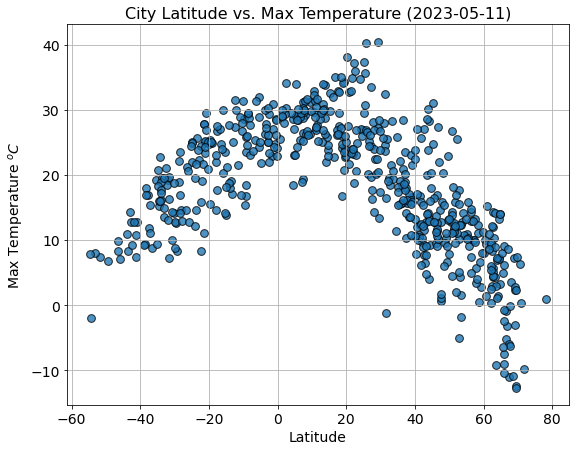

In [8]:
# Build scatter plot for latitude vs. temperature
plot1 = city_data_df.plot(kind = "scatter", x= "Lat",y= "Max Temp", alpha =0.8, marker='o', edgecolor = "black", s = 60,
             grid = True,figsize = (9,7))

# Incorporate the other graph properties
plt.xlabel("Latitude", size =14)
plt.ylabel("Max Temperature ${^oC}$", size =14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("City Latitude vs. Max Temperature ({})".format(time.strftime('%Y-%m-%d')),size=16)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

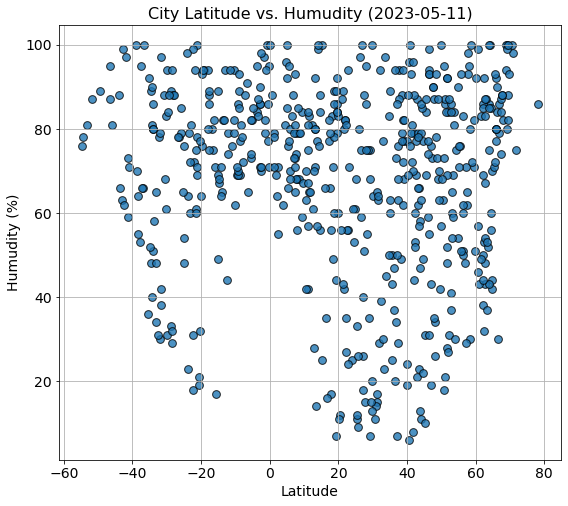

In [9]:
# Build the scatter plots for latitude vs. humidity
plot2 = city_data_df.plot(kind = "scatter", x= "Lat",y= "Humidity", alpha = 0.8, marker='o', edgecolor = "black", s = 60,
             grid = True,figsize = (9,8))

# Incorporate the other graph properties
plt.xlabel("Latitude", size =14)
plt.ylabel("Humudity (%)", size =14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("City Latitude vs. Humudity ({})".format(time.strftime('%Y-%m-%d')),size=16)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

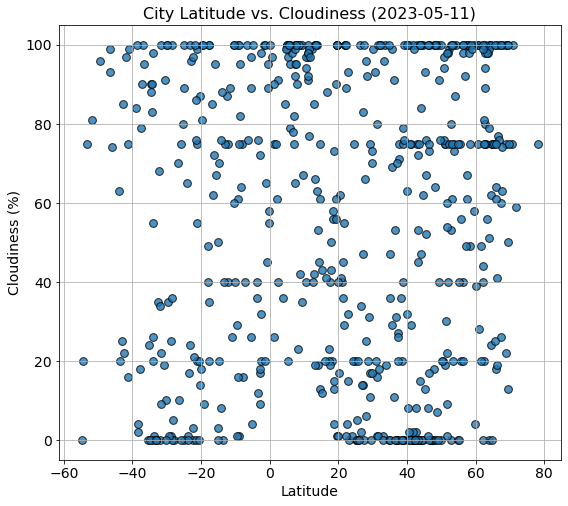

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plot2 = city_data_df.plot(kind = "scatter", x= "Lat",y= "Cloudiness", alpha = 0.8, marker='o', edgecolor = "black", s = 60,
             grid = True,figsize = (9,8))

# Incorporate the other graph properties
plt.xlabel("Latitude", size =14)
plt.ylabel("Cloudiness (%)", size =14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("City Latitude vs. Cloudiness ({})".format(time.strftime('%Y-%m-%d')),size=16)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

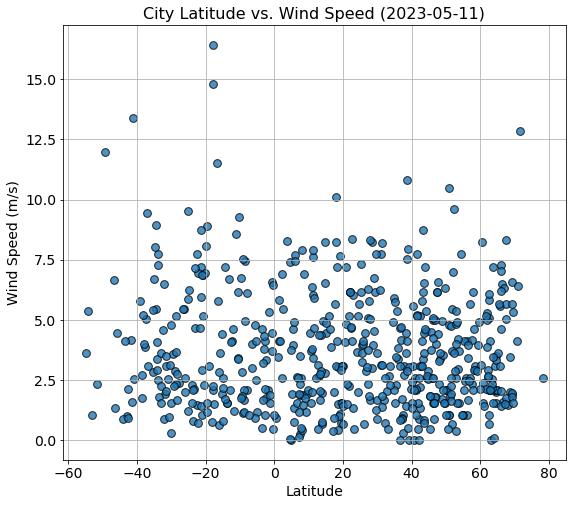

In [11]:
# Build the scatter plots for latitude vs. wind speed
plot3 = city_data_df.plot(kind = "scatter", x= "Lat",y= "Wind Speed", alpha = 0.8, marker='o', edgecolor = "black", s = 60,
             grid = True,figsize = (9,8))

# Incorporate the other graph properties
plt.xlabel("Latitude", size =14)
plt.ylabel("Wind Speed (m/s)", size =14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("City Latitude vs. Wind Speed ({})".format(time.strftime('%Y-%m-%d')),size=16)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
text = "Max vs Temp"
text.split("vs")

['Max ', ' Temp']

In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regresssion (x_values, y_values, title):
    #regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    y_regress = slope * x_values + intercept
    line_eqn = f"y={round(slope,2)}x+{round(intercept,2)}"
    
    #plot
    plt.figure(figsize = (9,7))
    plt.scatter(x_values, y_values, s = 60)
    plt.plot(x_values, y_regress, "r-")
    #text coordinates
    text_y_coord = max(y_values)/10
    if min(x_values) < 0:
        text_x_coord = min(x_values)
    elif max(x_values) > 0:
        text_x_coord = max(x_values)/10
        
    plt.annotate(line_eqn,(text_x_coord,text_y_coord), fontsize=12,color="red", size= 16)
    print(f"The r-squared value is {rvalue**2}")
    
    #label and graph properties
    plt.ylabel(title.split("vs")[0], size = 14 )
    plt.xlabel(title.split("vs")[1], size = 14)
    plt.yticks(size = 14)
    plt.xticks(size = 14)
    

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mount pearl,47.5166,-52.7813,0.64,90,0,6.17,CA,1683785845
2,dudinka,69.4058,86.1778,-12.43,88,50,6.57,RU,1683785857
3,volodarskiy,46.4013,48.5409,16.97,55,100,5.00,RU,1683786340
4,regina,50.4501,-104.6178,12.77,63,20,2.06,CA,1683786323
7,karak,31.1667,35.7500,24.68,17,16,3.12,JO,1683786340


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,grytviken,-54.2811,-36.5092,-2.00,78,20,5.35,GS,1683785819
5,blackmans bay,-43.0167,147.3167,14.29,63,25,1.00,AU,1683785840
6,alofi,-19.0595,-169.9187,24.94,94,9,3.09,NU,1683785882
8,edinburgh of the seven seas,-37.0676,-12.3116,15.34,66,100,9.44,SH,1683785816
10,batang,-6.4846,110.7083,25.37,91,100,4.00,ID,1683786341


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is 0.6892720004130056


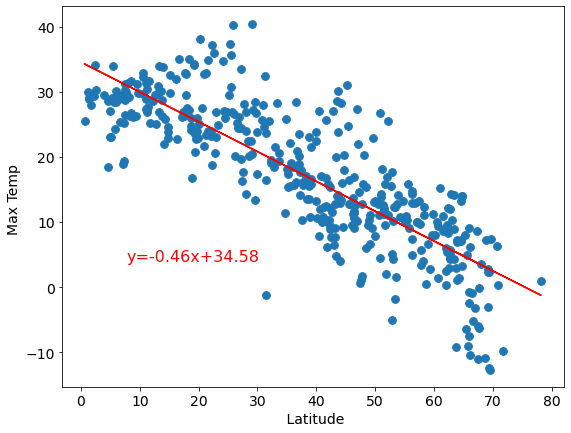

In [16]:
# Linear regression on Northern Hemisphere
plot_linear_regresssion(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Max Temp vs Latitude")

The r-squared value is 0.5900766336163564


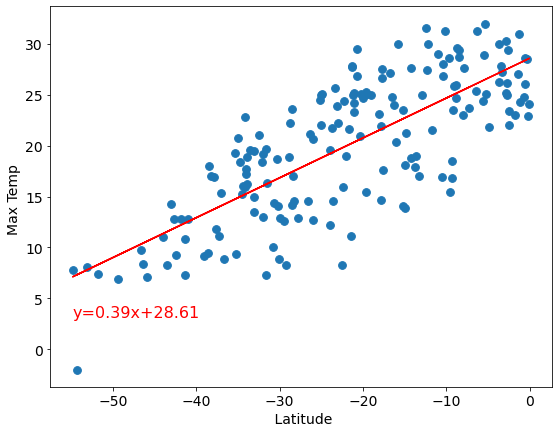

In [17]:
# Linear regression on Southern Hemisphere
plot_linear_regresssion(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Max Temp vs Latitude")

**Discussion about the linear relationship:** 
- Temperature decreases as we approach higher latitudes in the Northern hemisphere. Aprroximately 70% of the variance in the response varaible- Max temperature can be explained by ndependent variable- Latitude. 
- Conversely, temperature increases across latitudes in the southern hemisphere . Only about 60% of the variability in the outcome data can be explained by the model.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is 0.0041235076862539705


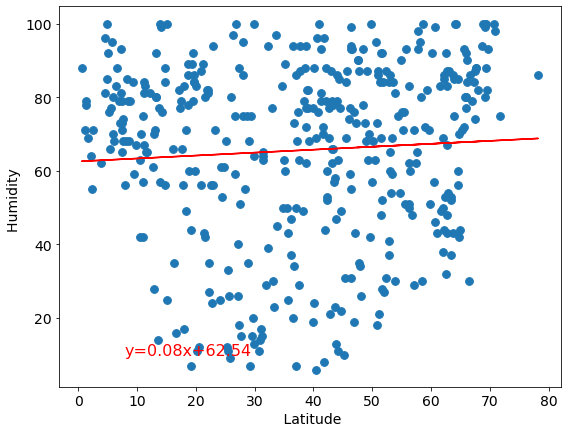

In [18]:
# Northern Hemisphere
plot_linear_regresssion(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity vs Latitude")

The r-squared value is 0.028457118175795954


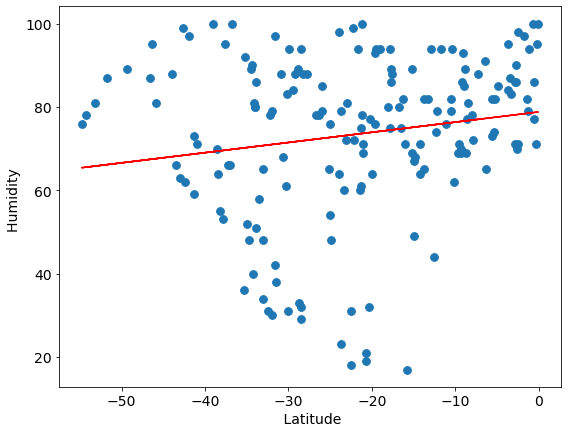

In [19]:
# Southern Hemisphere
plot_linear_regresssion(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity vs Latitude")

**Discussion about the linear relationship:** 
- The coefficient of determination among Humidity and Latitudes is approximately zero in both hemispheres. One may conclude that the regression model is very weak in explaining the variation among the variables. 


### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is 9.440789426596004e-05


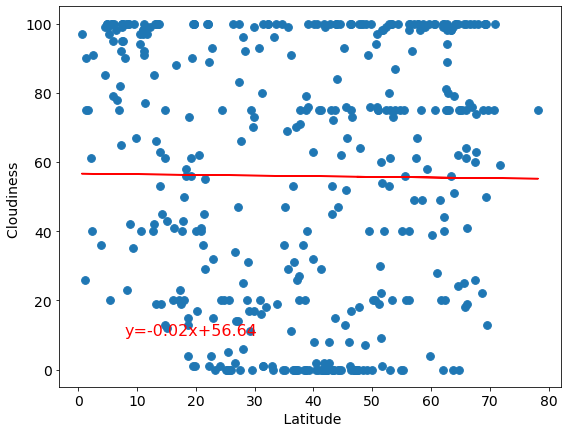

In [20]:
# Northern Hemisphere
plot_linear_regresssion(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness vs Latitude")

The r-squared value is 0.005796346804504976


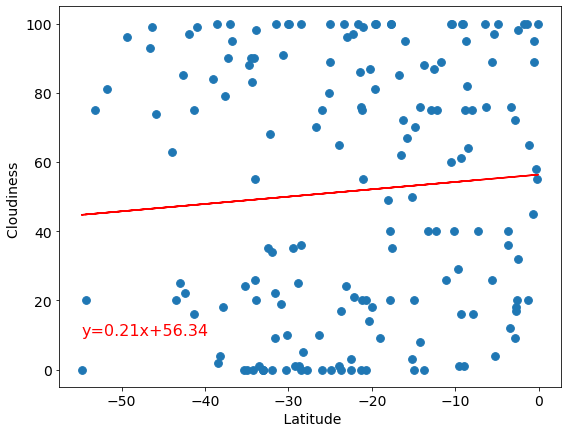

In [21]:
# Southern Hemisphere
plot_linear_regresssion(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness vs Latitude")

**Discussion about the linear relationship:** 
- The coefficient of determination between Cloudiness and Latitude for both hemispheres is approximately. It therefore could be inferred that no relationship exists between the variables. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is 0.00011268054819310507


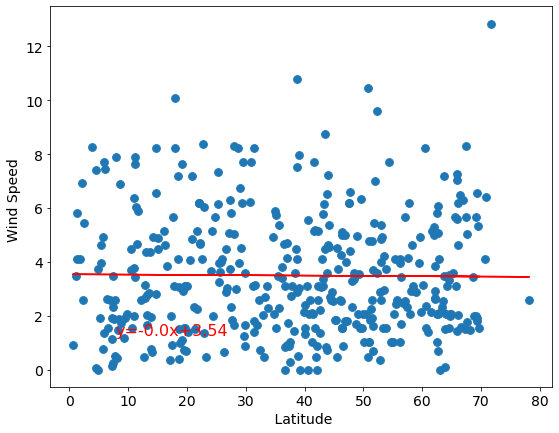

In [22]:
# Northern Hemisphere
plot_linear_regresssion(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed vs Latitude")

The r-squared value is 0.0062174810776681405


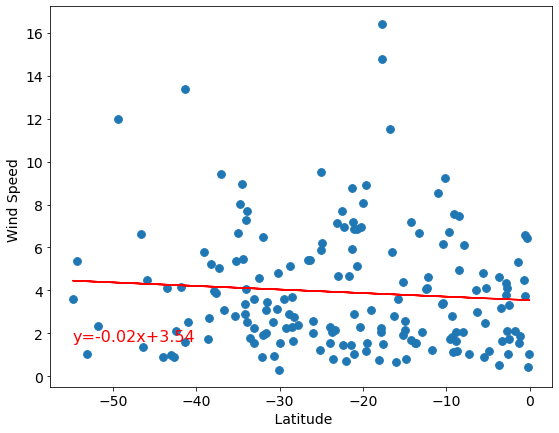

In [23]:
# Southern Hemisphere
plot_linear_regresssion(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed vs Latitude")

**Discussion about the linear relationship:** 
- From the r-squared values between Wind Speed and Latitude which is approximately zero for both hemispheres, it could be inferred that no relationship exists between the variables. 